In [1]:
#1. Import Package

import os, datetime
import pickle
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import IPython.display
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.random import set_seed
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,LSTM,Dropout,Bidirectional

set_seed(466)
np.random.seed(466)

In [2]:
#2. Load Data

csv_path = r'C:\Users\User\Desktop\AI_ML_TRAINING\YPAI09\Capstone\Capstone 1\Dataset\cases_malaysia.csv'
MODEL_PATH = os.path.join(os.getcwd(),'Model','model.pkl')

In [ ]:
#2. Load data

df = pd.read_csv(csv_path, index_col='date',parse_dates=['date']) # make the date become index instead of column


print(df.head())
print(df.info())

            cases_new  cases_import  cases_recovered  cases_active  \
date                                                                 
2020-01-25          4             4                0             4   
2020-01-26          0             0                0             4   
2020-01-27          0             0                0             4   
2020-01-28          0             0                0             4   
2020-01-29          3             3                0             7   

            cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  \
date                                                                          
2020-01-25              0            4           0           0            0   
2020-01-26              0            0           0           0            0   
2020-01-27              0            0           0           0            0   
2020-01-28              0            0           0           0            0   
2020-01-29              0          

In [4]:
# 3. Exploratary Data
#MISSING VALUE CHECK
df.isna().sum()

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             570
cluster_religious          570
cluster_community          570
cluster_highRisk           570
cluster_education          570
cluster_detentionCentre    570
cluster_workplace          570
dtype: int64

In [5]:
# 3. Exploratary Data
# Convert string(object) become integer
df['cases_new'] = pd.to_numeric(df['cases_new'],errors='coerce') 

In [6]:
# 3. Exploratary Data
# Replace null values at 7 columns of cluster with 0 and null values for case new with mean value
df['cases_new'] = df['cases_new'].fillna(df['cases_new'].mean())
df['cluster_import'] = df['cases_new'].fillna(0)
df['cluster_religious'] = df['cases_new'].fillna(0)
df['cluster_community'] = df['cases_new'].fillna(0)
df['cluster_highRisk'] = df['cases_new'].fillna(0)
df['cluster_education'] = df['cases_new'].fillna(0)
df['cluster_detentionCentre'] = df['cases_new'].fillna(0)
df['cluster_workplace'] = df['cases_new'].fillna(0)

In [7]:
# 3. Exploratary Data
#checking back the change made
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1744 entries, 2020-01-25 to 2024-11-02
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   cases_new                1744 non-null   int64
 1   cases_import             1744 non-null   int64
 2   cases_recovered          1744 non-null   int64
 3   cases_active             1744 non-null   int64
 4   cases_cluster            1744 non-null   int64
 5   cases_unvax              1744 non-null   int64
 6   cases_pvax               1744 non-null   int64
 7   cases_fvax               1744 non-null   int64
 8   cases_boost              1744 non-null   int64
 9   cases_child              1744 non-null   int64
 10  cases_adolescent         1744 non-null   int64
 11  cases_adult              1744 non-null   int64
 12  cases_elderly            1744 non-null   int64
 13  cases_0_4                1744 non-null   int64
 14  cases_5_11               1744 non-null

In [8]:
# 3. Exploratary Data
#Recheck missing value
df.isna().sum()

cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [9]:
# 3. Exploratary Data
df.describe().transpose()

#from the dataset seen like there is no outliers. All look good

,count,mean,std,min,25%,50%,75%,max
cases_new,1744.0,3050.001720,5588.837322,0.0,128.75,803.0,3200.00,33406.0
cases_import,1744.0,22.502867,76.601202,0.0,1.00,3.0,8.00,719.0
cases_recovered,1744.0,3023.658257,5540.421141,0.0,117.75,796.5,3227.50,33872.0
cases_active,1744.0,37942.768922,61800.088695,1.0,8460.25,13839.0,36568.00,323791.0
cases_cluster,1744.0,306.498280,619.205875,0.0,0.00,7.0,269.25,3394.0
cases_unvax,1744.0,1172.648509,2339.900620,0.0,24.00,125.0,1162.75,12681.0
cases_pvax,1744.0,250.495413,997.565343,0.0,0.00,2.0,19.00,7315.0
cases_fvax,1744.0,813.951261,1935.319149,0.0,1.00,44.0,439.00,13058.0
cases_boost,1744.0,812.906537,2248.538349,0.0,0.00,83.0,496.25,18176.0
cases_child,1744.0,371.459289,772.875075,0.0,8.75,48.0,245.25,4389.0


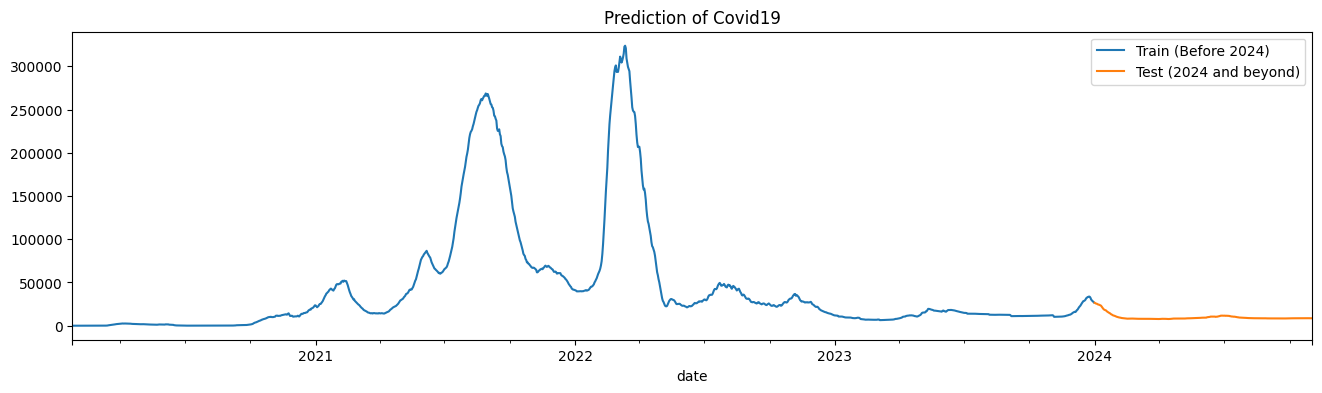

In [10]:
#3. Exploratary Data
# Analyse the train and test dataset

tstart = 2020
tend = 2023

def train_test_plot(df,tstart,tend):
    df.loc[f'{tstart}':f'{tend}','cases_active'].plot(figsize=(16,4),label=f"Train (Before {tend+1})")
    df.loc[f'{tend+1}':, 'cases_active'].plot(figsize=(16,4),label=f"Test ({tend+1} and beyond)")
    plt.legend()
    plt.title('Prediction of Covid19')
    plt.show()

train_test_plot(df,tstart,tend)

In [11]:
#4. Data Preprocessing
# Train-test-split the dataset
# this dataset does not include the validation data

def train_test_split(df,tstart,tend):
    train = df.loc[f"{tstart}":f"{tend}","cases_new"].values
    test = df.loc[f"{tend+1}":,"cases_new"].values
    return train,test

training_set,test_set = train_test_split(df,tstart,tend)

In [12]:
#5. Normalization the training dataset

sc = MinMaxScaler(feature_range=(0,1))
training_set = training_set.reshape(-1,1)
training_set_scaled = sc.fit_transform(training_set)
# print(type(training_set_scaled))
# print(training_set_scaled.shape)
print(training_set_scaled[:5])

[[1.19738969e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.98042268e-05]]


In [13]:
arr = np.array([1,2,3,4,5,6])
print(arr.shape)

print(arr.reshape(3,-1).shape)

(6,)
(3, 2)


In [14]:
# 6. Convert training dataset into inputs (X_train) and outputs (y_train).

def split_sequence(sequence,n_steps):
    X,y = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x,seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

n_steps = 30
features = 1
# split into samples
X_train,y_train = split_sequence(training_set_scaled,n_steps)

In [15]:
# 7. Reshape X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)
print(X_train.shape)

(1407, 30, 1)


In [ ]:
#8. Model Development
# The LSTM Architecture
model_lstm = keras.Sequential()
model_lstm.add(keras.layers.LSTM(32,activation='tanh',input_shape=(n_steps,features), return_sequences = True)) 
model_lstm.add(Dropout(0.01))
model_lstm.add(LSTM(units=64))
model_lstm.add(keras.layers.Dense(1))

c:\Users\User\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,249 (114.25 KB)

 Trainable params: 29,249 (114.25 KB)

 Non-trainable params: 0 (0.00 B)

None


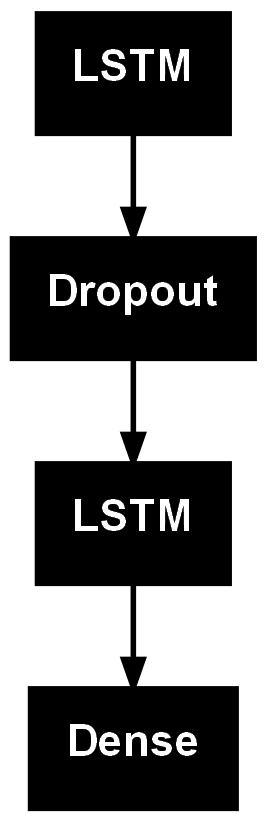

In [17]:
#8. Model Development
# Compiling the model

model_lstm.compile(optimizer='adam',loss='mse', metrics =['mae'])
print(model_lstm.summary())
keras.utils.plot_model(model_lstm)

In [18]:
#8. Model Development

es = keras.callbacks.EarlyStopping (patience=2, verbose=1)
logpath = 'tensorboard/covid19latest/' + datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S')
tb= keras.callbacks.TensorBoard(logpath)
history = model_lstm.fit(X_train,
                         y_train,
                        epochs = 50,
                        batch_size=32,
                        callbacks= [es, tb])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0175 - mae: 0.0636
Epoch 2/50
 9/44 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0024 - mae: 0.0250

c:\Users\User\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0020 - mae: 0.0224
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - mae: 0.0169
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - mae: 0.0172
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - mae: 0.0174
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0011 - mae: 0.0170
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010 - mae: 0.0165
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010 - mae: 0.0165
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.6989e-04 - mae: 0.0165
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7386e-04 - mae: 0.0164
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.6915e-04 - mae: 0.0159
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.5136e-04 - mae: 0.0163
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7519e-04 - mae: 0.0165
Epoch 14/50
44/44 ━━━━━━━━━

In [19]:
#9. Result 

df_total = df.loc[:,'cases_new']
inputs = df_total[len(df_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1,1)
# scaling
inputs = sc.transform(inputs)

# Split into samples
X_test,y_test = split_sequence(inputs,n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],features)
# predictions
predicted_new_cases_covid19 = model_lstm.predict(X_test)
# inverse transform the values - undo the normalization of stock prices (undo any sklearn's transform)
predicted_new_cases_covid19 = sc.inverse_transform(predicted_new_cases_covid19)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [20]:
#9. Prediction graph plot

def plot_predictions(test,predicted):
    plt.plot(test,color='gray',label='Real')
    plt.plot(predicted,color='red',label='Predicted')
    plt.title('Covid19 Prediction')
    plt.xlabel('Day')
    plt.ylabel('Covid-19 New cases')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = np.sqrt(mean_squared_error(test,predicted))
    print('The root mean square error is {:.2f}.'.format(rmse))

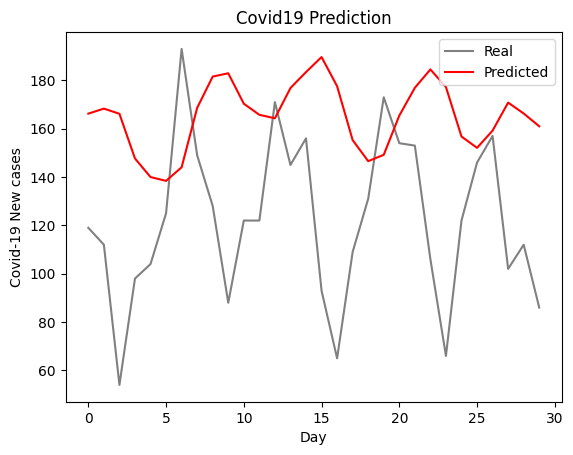

In [21]:
plot_predictions(test_set[-30:],predicted_new_cases_covid19[-30:])

In [ ]:
#10. Model Evaluation 
evaluation = model_lstm.evaluate(X_test, y_test)
print(evaluation)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8809e-05 - mae: 0.0039 
[2.20228721445892e-05, 0.0025808291975408792]


In [29]:
#10. Model Evaluation 
#model evaluation using MAE
mae= evaluation[1]
mape = (mae/sum(abs(y_test))) * 100

print(f"MAE is\n",mae)
print(f"MAPE is\n",mape)

MAE is
 0.0025808291975408792
MAPE is
 [0.09626098]


In [25]:
#11. MODEL SAVING
import pickle

with open (MODEL_PATH, 'wb') as file:
    pickle.dump(model_lstm,file)  